ㆍ수치계산과 데이터의 흐름을 노드(node)와 엣지(edge)를 사용한 양방향 그래프(directed graph)로 표현
ㆍ노드(수치연산) / 엣지(노드 사이를 이동하는 다차원 데이터 텐서)
ㆍ머신러닝과 딥 뉴럴 네트워크 연구를 목적으로 구글의 인공지능 연구조직인 구글 브레인 팀의 연구자와 엔지니어들에 의해 개발
ㆍ코드 수정없이 데스크탑, 서버 혹은 모바일 디바이스에서 CPU나 GPU, TPU를 사용하여 연산을 수행
ㆍ분산 실행환경이 가능 / 아이디어 테스트에서 서비스 단계까지 모두 이용가능
ㆍ계산구조와 목표함수만 정의하면 자동으로 미분 계산 처리

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape, test_images.shape, train_labels

((60000, 28, 28), (10000, 28, 28), array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

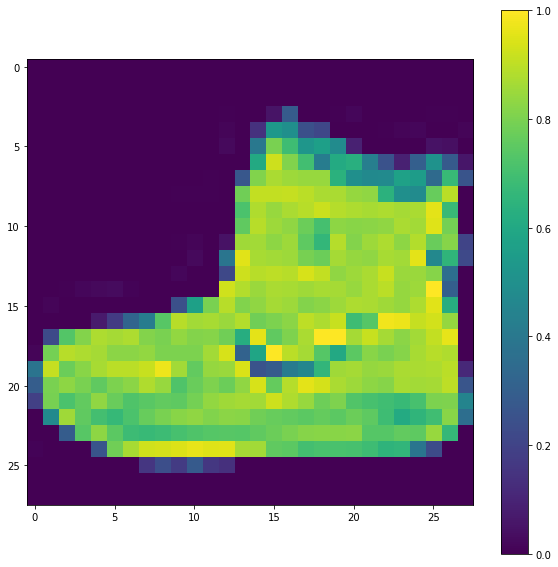

In [22]:
# 스케일링 / float형태로 나눗셈을 한 이유 : 결과값을 float형태로 받기 위해서
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize = (10, 10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax) # 마지막 Dense값은 10이어야 함.
])

ㆍ손실함수(loss function) : 훈련하는 동안 모델의 오차를 측정. 모델의 학습방향이 올바른 방향으로 향하도록 해당 함수값을 최소화
ㆍ옵티마이저(optimizer) : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정
ㆍ지표(metrics) : 훈련단계와 테스트단계를 모니터링 하기위해 사용
ㆍ모델 훈련
ㆍ훈련데이터를 모델에 주입 / 모델이 이미지와 레이블을 매핑하는 방법 / 테스트 세트에 대한 모델의 예측

In [42]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5) # epochs : 학습시킨 횟수(전체데이터를 모델에 몇번 학습시키는지를 표현)
# 일반적으로 epochs의 수치가 높을 수록 손실함수는 낮아지나, 오버피팅의 문제가 발생가능. 최적의 파라미터를 찾기위해 실시함.
test_loss, test_acc = model.evaluate(test_images, test_labels) # 모델 성능평가
predictions = model.predict(test_images)
predictions[0]

Epoch 1/5
1875/1875 [==============================] - 2s 925us/step - loss: 0.2313 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 2s 902us/step - loss: 0.2261 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 925us/step - loss: 0.2172 - accuracy: 0.9183
Epoch 4/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.2114 - accuracy: 0.9214
Epoch 5/5
313/313 [==============================] - 0s 806us/step - loss: 0.3515 - accuracy: 0.8832


array([7.5928142e-10, 5.5918074e-12, 8.8290114e-10, 6.2559255e-12,
       2.1413453e-10, 4.5823565e-04, 1.5677358e-10, 1.9475283e-02,
       1.8637700e-06, 9.8006457e-01], dtype=float32)

In [43]:
np.argmax(predictions[0]), test_labels[0] # 예측값과 실제값을 비교
n = 0
for i in range(len(test_labels)):
    if np.argmax(predictions[i]) != test_labels[i]:
        n += 1
print(n)

1168


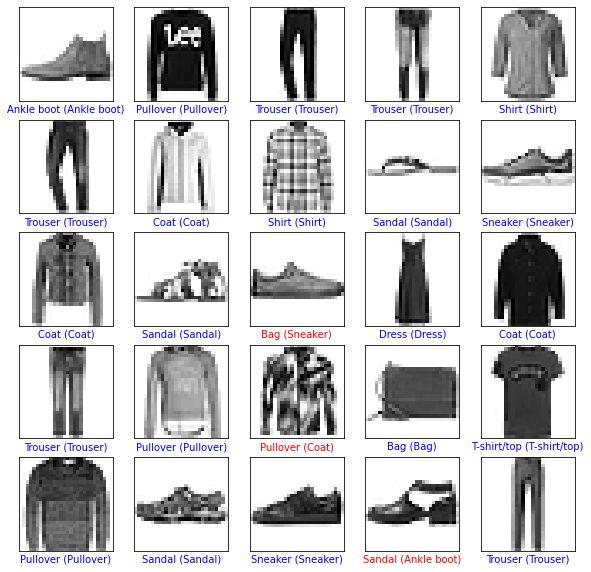

In [51]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

In [52]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_value_array(i, predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

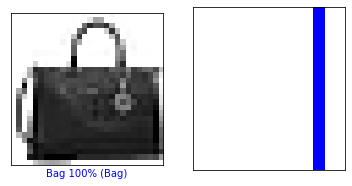

In [59]:
i = 30
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

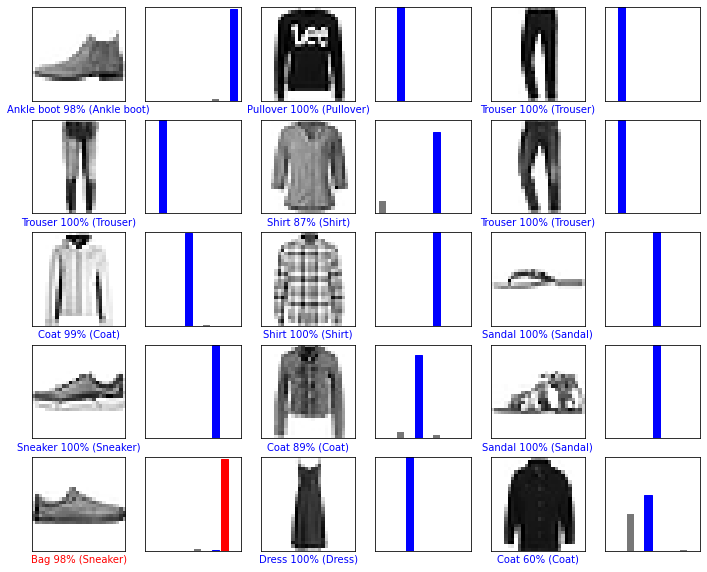

In [61]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize =(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [63]:
# 테스트 세트에서 이미지 1개를 선택
img = test_images[0]
print(img.shape)
# 이미지 하나만 사용할때도 배치에 추가(리스트의 1개 요소에 1개의 데이터 셋이 들어가도록 해줘야 오류가 안남)
img = (np.expand_dims(img, 0))
print(img.shape) # 2차원에서 3차원 리스트로 변환된것을 확인할 수 있음.
predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[7.5928436e-10 5.5918182e-12 8.8290114e-10 6.2559255e-12 2.1413413e-10
  4.5823478e-04 1.5677327e-10 1.9475274e-02 1.8637683e-06 9.8006457e-01]]


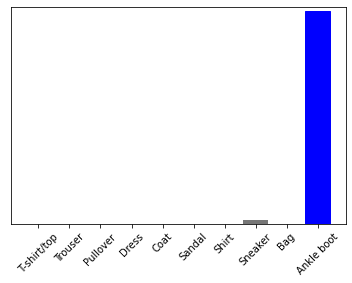

In [65]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [67]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
